# Introduction to Image Classification with PyTorch

We'll be using computer vision to answer the question that never gets old on the internet: is it a sloth or a pain au chocolat? This is a binary image classification task. 

![sloth_or_pain_au_chocolat.jpg](sloth_or_pain_au_chocolat.jpg)

In the age of deep learning, data scientists and machine learning engineers seldom create and train neural networks from scratch. A big chunk of what goes into performing a machine learning task, however, is collecting, preparing, and loading data to feed into a model. We'll perform a little bit of fine-tuning on the model, but this will not be the focus of the training.

In this session, we'll be adapting code from PyTorch.org's [tutorials](https://pytorch.org/tutorials) on [loading custom datasets](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to load a dataset we have collected into PyTorch.

We'll then use [this tutorial on transfer learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html?highlight=transfer%20learning) to perform an image processing task using a mostly-pretrained model, which we'll fine tune.

Specifically, we'll be labeling images with one of two labels: `sloth`, or `pain_au_chocolat`.


# Package Imports

Like all great Python projects, ours too, will start with some package imports! We'll use: 
- `NumPy` for manipulating numerical arrays
- `Matplotlib.pyplot` for plotting
- `time`, which provides time-related functions
- `os`, a way of providing functionality that interacts with the operating system
- `copy`, for copying objects
- various packages from torch, including:
    - `torch`
    - `torch.nn`, which contains the basic building blocks for neural networks
    - `torch.optim`, a package containing various optimization algorithms for PyTorch
    - `lr_scheduler` from `torch.optim`, for adjusting the learning rate based on the number of epochs
    - `torch.backends.cudnn` as `cudnn`, a means for PyTorch to talk to the GPU (although GPUs may not be supported in your workspace)
- `torchvision`, which provides additional functionalities to manipulate and process images, including
    - `datasets`, which contains built in datasets
    - `models`, containing models for various tasks, including image processing
    - `transforms`, which we'll use to transform images in preparation for image processing


In [2]:
# Package imports go here
import numpy as np
import matplotlib.pyplot as plt

import time
import os
import copy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn

import torchvision
from torchvision import datasets, models, transforms

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1067eecc0>>
Traceback (most recent call last):
  File "/Users/domszy/Desktop/Sloth or Pastry/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


## Initalizations
For fast runtime, let's begin our project by setting `cudnn.benchmark` to True. You can read more about this [here](https://discuss.pytorch.org/t/what-does-torch-backends-cudnn-benchmark-do/5936).

In [9]:
# Enable cudnn benchmark
cudnn.benchmark = True

# Reading and transforming the data

While [the PyTorch.org](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) tutorial provides extensive information on loading, transforming, rescaling, cropping, and converting images to tensors using `torch` and `torch.utils`, we'll be using the `torchvision` package, which provides some frequently used data loaders and transforms out-of-the-box.

One of the things it assumes is that data is organized in a certain way. Navigate to the data folder to see how the data is structured. Within the directory called "data/sloths_versus_pain_au_chocolat", there are two folders called `"train"` and `"val"`. Our dataset contains two labels:
- `sloth`, and
- `pain_au_chocolat`
so our folders are named and organized accordingly. Note that the images contained in the `sloth`, and `pain_au_chocolat` folders don't need to be named in any way, as long as the folders themselves are labelled correctly.

To adapt this tutorial to use different data, all you need to do is change the names of the `sloth`, and `pain_au_chocolat` folders, and upload different images into them.    

When running code in notebooks, sometimes a file called `.ipynb_checkpoints` can show up in our training and validation folders. We'll remove these with the lines below.

rm: data/sloths_versus_pain_au_chocolat/train/.ipynb_checkpoints: No such file or directory
rm: data/sloths_versus_pain_au_chocolat/val/.ipynb_checkpoints: No such file or directory


We'll begin loading and transforming our data by defining the specific transforms we'd like to use from `torchvision`.

The specific transforms we'll use on our training set are:
- `RandomResizedCrop()`, used to crop a random portion of an image and resize it to a given size, passed as the first argument to the function
- `RandomHorizontalFlip()`, used to horizontally flip an image randomly with a given probability (default is 0.5)
- `ToTensor()`, used to convert an image or `numpy.ndarray` to a tensor
- `Normalize()`, used to normalize a tensor image with given means and standard deviations, passed as lists as the first and second arguments, respectively (taking tensors as input). If the images are similar to ImageNet images, we can use the mean and standard deviation of the ImageNet dataset. These are:
    - `mean` = [0.485, 0.456, 0.406] 
    - `std` = [0.229, 0.224, 0.225].

The specific transforms we'll use on our validation set are:
- `Resize()` used to resize an input to a given size, passed as the first argument
- `CenterCrop()` to crop a given image at the center, based on dimensions provided in the first argument
- `ToTensor()`
- `Normalize()`

Next, we'll:
- create a data directory path containing our dataset
- pass our directory to `datasets.ImageFolder()` to create a data loader called `image_datasets`, where the images are arranged in the same way our folders are currently structured
- use `image_datasets` to obtain our training and validation `dataset_sizes` and `class_names`
- pass `image_datasets` to `torch.utils.data.DataLoader()`, which enables us to sample from our dataset, using
    - `batch_size` = 4, which uses 4 images per batch
    - `shuffle` = True, which will shuffle the data at every epoch


['pain_au_chocolat', 'sloths']


# Visualizing sloths and pastries with a custom function! 

## Defining the function



## Calling our `imshow()` function

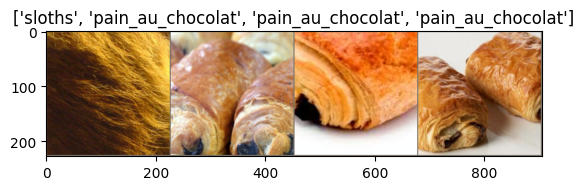

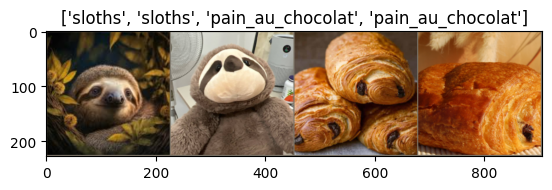

# Running the model with 25 epochs

We'll now apply a pre-trained model on our data. We won't go over the details of the model, but the code used to create the function `train_model()` is provided below.

## Samples, batches and epochs
- A sample is a single image or a single row of data.
- A batch is a group of images. Batch size will determine the number of samples to work through before a hyperparameter is updated.
- An epoch is the number of times the model or learning algorithm will encounter all samples in the dataset. In one epoch, the complete dataset will have had an opportunity to update the internal model parameters.

## Defining functions for training the model and visualizing model results

In [18]:
def visualize_model(model, num_images=6):
    '''
    Function that will visualize results of the model
    '''
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Loading a pre-trained model

We'll use a model called ResNet18, developed by authors [Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun](https://arxiv.org/abs/1512.03385).


In [19]:
# Load the resnet model
model_ft = models.resnet18(pretrained=True)

# Obtaining the number of input features for our final layer
num_ftrs = model_ft.fc.in_features

# Since this is a binary classification task, we'll set the size of each output sample to 2. For multi-class classification, this can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

# Move the model to the device
model_ft = model_ft.to(device)

# We'll use CrossEntropyLoss(), which is a common loss function for classification problems
criterion = nn.CrossEntropyLoss()

# In this step, we'll optimize all parameters of the model
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# We'll decay learning rate (lr) by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/Users/domszy/Desktop/Sloth or Pastry/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/domszy/Desktop/Sloth or Pastry/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/domszy/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


Epoch 0/24
----------
train Loss: 0.4331 Acc: 0.8415
val Loss: 0.1038 Acc: 1.0000

Epoch 1/24
----------
train Loss: 0.1519 Acc: 0.9634
val Loss: 0.0782 Acc: 1.0000

Epoch 2/24
----------
train Loss: 0.0999 Acc: 0.9634
val Loss: 0.0076 Acc: 1.0000

Epoch 3/24
----------
train Loss: 0.1609 Acc: 0.9634
val Loss: 0.0074 Acc: 1.0000

Epoch 4/24
----------
train Loss: 0.0332 Acc: 1.0000
val Loss: 0.0043 Acc: 1.0000

Epoch 5/24
----------
train Loss: 0.0797 Acc: 0.9878
val Loss: 0.0018 Acc: 1.0000

Epoch 6/24
----------
train Loss: 0.0164 Acc: 1.0000
val Loss: 0.0020 Acc: 1.0000

Epoch 7/24
----------
train Loss: 0.0156 Acc: 1.0000
val Loss: 0.0018 Acc: 1.0000

Epoch 8/24
----------
train Loss: 0.0492 Acc: 0.9878
val Loss: 0.0024 Acc: 1.0000

Epoch 9/24
----------
train Loss: 0.1375 Acc: 0.9634
val Loss: 0.0017 Acc: 1.0000

Epoch 10/24
----------
train Loss: 0.0393 Acc: 1.0000
val Loss: 0.0014 Acc: 1.0000

Epoch 11/24
----------
train Loss: 0.0333 Acc: 0.9878
val Loss: 0.0017 Acc: 1.0000

Ep

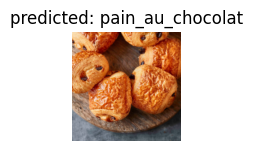

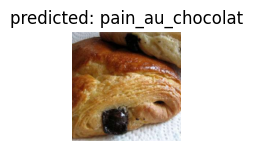

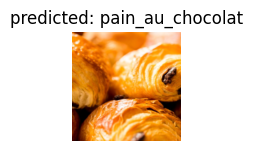

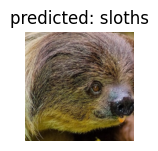

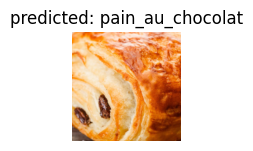

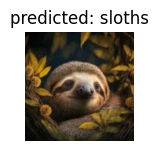

Epoch 0/24
----------
train Loss: 0.4312 Acc: 0.8293
val Loss: 0.6340 Acc: 0.7500

Epoch 1/24
----------
train Loss: 0.1784 Acc: 0.9146
val Loss: 0.1212 Acc: 1.0000

Epoch 2/24
----------
train Loss: 0.1659 Acc: 0.9634
val Loss: 0.1286 Acc: 0.9375

Epoch 3/24
----------
train Loss: 0.1824 Acc: 0.9268
val Loss: 0.0926 Acc: 1.0000

Epoch 4/24
----------
train Loss: 0.2272 Acc: 0.9268
val Loss: 0.0714 Acc: 1.0000

Epoch 5/24
----------
train Loss: 0.1234 Acc: 0.9268
val Loss: 0.0192 Acc: 1.0000

Epoch 6/24
----------
train Loss: 0.0895 Acc: 0.9634
val Loss: 0.0107 Acc: 1.0000

Epoch 7/24
----------
train Loss: 0.0986 Acc: 0.9634
val Loss: 0.0089 Acc: 1.0000

Epoch 8/24
----------
train Loss: 0.0855 Acc: 0.9878
val Loss: 0.0143 Acc: 1.0000

Epoch 9/24
----------
train Loss: 0.0665 Acc: 0.9756
val Loss: 0.0115 Acc: 1.0000

Epoch 10/24
----------
train Loss: 0.0624 Acc: 0.9878
val Loss: 0.0118 Acc: 1.0000

Epoch 11/24
----------
train Loss: 0.0543 Acc: 0.9878
val Loss: 0.0126 Acc: 1.0000

Ep

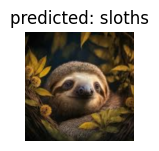

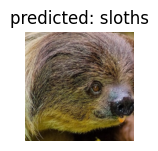

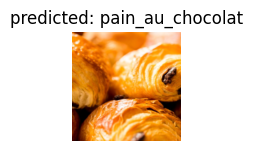

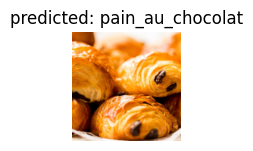

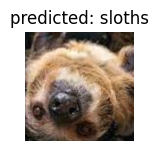

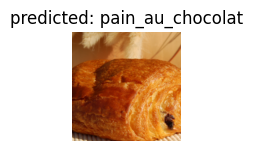

# Where to next?

## Tutorials
- [Tutorial] [A beginner's guide to object detection](https://www.datacamp.com/tutorial/object-detection-guide)

## DataCamp courses
- [Course] [Introduction to Deep Learning with PyTorch](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-pytorch/introduction-to-pytorch-a-deep-learning-library?ex=1)
- [Course: coming soon] Intermediate Deep Learning with PyTorch
- [Course: coming soon] Deep Learning for Images with PyTorch


## DataCamp tracks
- [Skill track] [Image Processing with Python ](https://app.datacamp.com/learn/skill-tracks/image-processing)